# Dimensional Resemblance Analysis (DRA) Dataset B

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from tqdm import tqdm
print('Libraries imported!!')

Libraries imported!!


In [2]:
#define directory of functions and actual directory
HOME_PATH = '' #home path of the project
FUNCTIONS_DIR = 'EVALUATION FUNCTIONS/RESEMBLANCE'
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)

#import functions for univariate resemblance analisys
from dimensional_resemblance import preprocess_data
from dimensional_resemblance import pca_transform
from dimensional_resemblance import isomap_transform_on_batch
from dimensional_resemblance import isomap_transform
from dimensional_resemblance import umap_transform_on_batch
from dimensional_resemblance import umap_transform
from dimensional_resemblance import dra_distance

#change directory to actual directory
os.chdir(ACTUAL_DIR)
print('Functions imported!!')

Functions imported!!


## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [3]:
#Define global variables
DATA_TYPES = ['Real','GM','SDV','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV','CTGAN','WGANGP']
FILEPATHS = {'Real' : HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/B_Cardio_Data_Real_Train.csv',
            'GM' : HOME_PATH + 'SYNTHETIC DATASETS/GM/B_Cardio_Data_Synthetic_GM.csv',
            'SDV' : HOME_PATH + 'SYNTHETIC DATASETS/SDV/B_Cardio_Data_Synthetic_SDV.csv',
            'CTGAN' : HOME_PATH + 'SYNTHETIC DATASETS/CTGAN/B_Cardio_Data_Synthetic_CTGAN.csv',
            'WGANGP' : HOME_PATH + 'SYNTHETIC DATASETS/WGANGP/B_Cardio_Data_Synthetic_WGANGP.csv'}
categorical_columns = ['gender','cholesterol','gluc','smoke','alco','active','cardio']
data = dict()

In [4]:
#iterate over all datasets filepaths and read each dataset
for name, path in FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category')
data

{'Real':           id    age gender  height  weight  ap_hi  ap_lo cholesterol gluc  \
 0      67617  21876      1     154    80.0    130     90           2    1   
 1      96320  16717      2     162    70.0    140     90           1    1   
 2      17571  21128      2     174    92.0    150    100           1    1   
 3      46492  23366      2     173    76.0    120     82           1    1   
 4        945  20281      1     160    60.0    120     80           1    1   
 ...      ...    ...    ...     ...     ...    ...    ...         ...  ...   
 55995  53137  16001      2     170    75.0    150     80           1    1   
 55996   8918  23209      2     162    73.0    160     90           1    1   
 55997  78302  23589      1     169    74.0    120     80           1    1   
 55998   1197  18227      1     167    70.0    120     80           1    1   
 55999  22556  15114      2     177    64.0    120     80           1    1   
 
       smoke alco active cardio  
 0         0    0   

## 2. Preprocess variables for data reduction

In [5]:
data_scaled = dict()
for name in DATA_TYPES :
    data_scaled[name] = preprocess_data(data[name])
data_scaled

{'Real': array([[ 0.61108193,  0.97638644, -1.26391038, ...,  1.        ,
          0.        ,  1.        ],
        [ 1.60512091, -1.11280043, -0.28679781, ...,  0.        ,
          0.        ,  1.        ],
        [-1.12210535,  0.67347662,  1.17887105, ...,  1.        ,
          0.        ,  1.        ],
        ...,
        [ 0.98112362,  1.67008234,  0.56817569, ...,  1.        ,
          1.        ,  0.        ],
        [-1.68916782, -0.50131135,  0.32389755, ...,  0.        ,
          1.        ,  0.        ],
        [-0.94946541, -1.76195076,  1.54528826, ...,  1.        ,
          1.        ,  0.        ]]),
 'GM': array([[-1.60809221, -2.08584273, -0.59188072, ...,  1.        ,
          1.        ,  0.        ],
        [-1.43062341,  1.24058496, -1.80987208, ...,  1.        ,
          0.        ,  1.        ],
        [-0.81252688,  1.31232907, -1.93167122, ...,  1.        ,
          0.        ,  1.        ],
        ...,
        [-0.01336374, -0.26926577,  0.13

## 3. Principal Component Analysis (PCA)

In [6]:
pca = dict()
pca['Real'] = pca_transform(data_scaled['Real'], np.zeros((len(data_scaled['Real']), 1)))
for name in SYNTHESIZERS :
    pca[name] = pca_transform(data_scaled[name], np.ones((len(data_scaled[name]), 1)))
pca

{'Real':             PC1       PC2  Label
 0      0.767296  1.513647    0.0
 1      0.021777 -0.720439    0.0
 2     -1.914505  0.628933    0.0
 3     -1.089310  1.028206    0.0
 4      1.231185 -0.152190    0.0
 ...         ...       ...    ...
 55995 -1.001241 -1.190214    0.0
 55996 -0.056086  1.310941    0.0
 55997 -0.076364  0.909135    0.0
 55998  0.172335 -0.814541    0.0
 55999 -0.901279 -2.317064    0.0
 
 [56000 rows x 3 columns],
 'GM':             PC1       PC2  Label
 0     -0.551741 -0.564146    1.0
 1     -0.004416  2.174472    1.0
 2      0.379343  2.418095    1.0
 3      0.358589  0.195730    1.0
 4      0.400806 -0.461536    1.0
 ...         ...       ...    ...
 55995 -0.554473  1.302689    1.0
 55996  0.659349  0.702064    1.0
 55997  1.748159  0.714450    1.0
 55998 -0.729511 -0.576063    1.0
 55999  0.237708 -0.315346    1.0
 
 [56000 rows x 3 columns],
 'SDV':             PC1       PC2  Label
 0      1.042316 -0.914435    1.0
 1     -1.054723  0.134003    1.0
 2 

GM
- Joint distance:  0.0683
#############################################
SDV
- Joint distance:  0.0132
#############################################
CTGAN
- Joint distance:  0.0475
#############################################
WGANGP
- Joint distance:  0.3807
#############################################


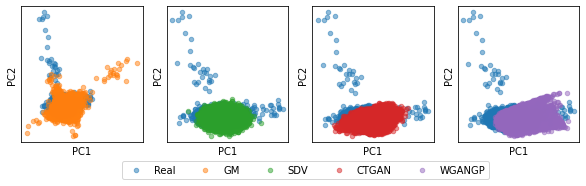

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10,2.5))
axs_idxs = range(4)
idx = dict(zip(SYNTHESIZERS,axs_idxs))
targets = [0,1]
COLORS = [['tab:blue','tab:orange'], ['tab:blue','tab:green'], ['tab:blue','tab:red'], ['tab:blue','tab:purple']]
cont = 0
first = True 
legend_data = list()
pca_real = pca['Real'][['PC1','PC2']]
for name in SYNTHESIZERS :
    
    pca_data = pd.DataFrame(data=pca['Real'], columns=['PC1','PC2','Label']).append(pca[name]).sample(frac=1)
    ax = axs[idx[name]]
    colors = COLORS[cont]
    
    for target, color in zip(targets,colors):
        indicesToKeep = pca_data['Label'] == target
        handles = ax.scatter(pca_data.loc[indicesToKeep, 'PC1'], pca_data.loc[indicesToKeep, 'PC2'], c = color, s = 20, alpha = 0.5)
        
        if target == 1 or first == True :
            legend_data.append(handles)
            first = False
            
        pca_synthetic = pca[name][['PC1','PC2']]
    
    print(name)
    joint_dist = dra_distance(pca_real, pca_synthetic)
    print('- Joint distance: ', joint_dist)
    print('#############################################')
             
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_xticks([])
    ax.set_yticks([])
    cont=cont+1

ax.legend(handles=legend_data, ncol=5, labels=DATA_TYPES, bbox_to_anchor=(0.3,-0.1))
fig.savefig('DATA REDUCTION RESULTS/PCA_PLOTS.png', bbox_inches='tight')

## 4. ISOMAP

In [8]:
isomap = dict()
#isomap['Real'] = isomap_transform_on_batch(data_scaled['Real'], np.zeros((len(data_scaled['Real']), 1)))
isomap['Real'] = isomap_transform(data_scaled['Real'], np.zeros((len(data_scaled['Real']), 1)))
for name in SYNTHESIZERS :
    #isomap[name] = isomap_transform_on_batch(data_scaled[name], np.ones((len(data_scaled[name]), 1)))
    isomap[name] = isomap_transform(data_scaled[name], np.ones((len(data_scaled[name]), 1)))
isomap

{'Real':             PC1       PC2  Label
 0      3.478566  2.436725    0.0
 1      2.871356 -5.354306    0.0
 2      5.019736 -0.654604    0.0
 3      4.596576  0.127929    0.0
 4     -6.708570  2.468277    0.0
 ...         ...       ...    ...
 55995  5.675215  0.247530    0.0
 55996  6.230136 -0.410975    0.0
 55997 -5.725591  2.065060    0.0
 55998 -3.816768 -1.684996    0.0
 55999 -1.905757 -3.785723    0.0
 
 [56000 rows x 3 columns],
 'GM':             PC1       PC2  Label
 0     -0.317733 -7.136664    1.0
 1      1.659061  4.992549    1.0
 2      3.729415  4.827171    1.0
 3      1.247507  2.407652    1.0
 4     -2.710355 -2.580507    1.0
 ...         ...       ...    ...
 55995  1.085530  2.988970    1.0
 55996  7.775630 -1.543332    1.0
 55997  4.209037  3.129298    1.0
 55998  0.486992 -6.442983    1.0
 55999 -0.364209 -5.507881    1.0
 
 [56000 rows x 3 columns],
 'SDV':             PC1       PC2  Label
 0     -3.467575 -2.089279    1.0
 1     -3.547893 -1.162504    1.0
 2 

GM
- Joint distance:  0.2797
#############################################
SDV
- Joint distance:  0.7284
#############################################
CTGAN
- Joint distance:  0.649
#############################################
WGANGP
- Joint distance:  4.4508
#############################################


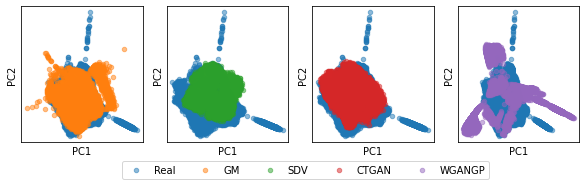

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 2.5))
axs_idxs = range(4)
idx = dict(zip(SYNTHESIZERS,axs_idxs))
targets = [0,1]
COLORS = [['tab:blue','tab:orange'], ['tab:blue','tab:green'], ['tab:blue','tab:red'], ['tab:blue','tab:purple']]
cont = 0
first = True 
legend_data = list()
isomap_real = isomap['Real'][['PC1','PC2']]
for name in SYNTHESIZERS :
    
    isomap_data = pd.DataFrame(data=isomap['Real'], columns=['PC1','PC2','Label']).append(isomap[name]).sample(frac=1)
    ax = axs[idx[name]]
    colors = COLORS[cont]
    
    for target, color in zip(targets,colors):
        indicesToKeep = isomap_data['Label'] == target
        handles = ax.scatter(isomap_data.loc[indicesToKeep, 'PC1'], isomap_data.loc[indicesToKeep, 'PC2'], c = color, s = 20, alpha = 0.5)
        
        if target == 1 or first == True :
            legend_data.append(handles)
            first = False
            
        isomap_synthetic = isomap[name][['PC1','PC2']]
        
    print(name)
    joint_dist = dra_distance(isomap_real, isomap_synthetic)
    print('- Joint distance: ', joint_dist)
    print('#############################################')
             
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_xticks([])
    ax.set_yticks([])
    cont=cont+1

ax.legend(handles=legend_data, ncol=5, labels=DATA_TYPES, bbox_to_anchor=(0.3,-0.1))
fig.savefig('DATA REDUCTION RESULTS/ISOMAP_PLOTS.png', bbox_inches='tight')